# Workbook 9
This workbook focuses on multilevel modeling.

# Multilevel modeling: examining clusters
Multilevel modeling is a set of statistics that controls for clusters within data. Clusters can be anything that is grouping observations together. For example, multilevel modeling is popular within education studies because they control for students nested within classrooms within schools. I use multilevel modeling in my research because I control for geographic areas like tracts nested within counties nested within states. You can also do panel analysis within multilevel analysis where you group times within a person.

cross-sectional, three levels 


cross-sectional, three levels
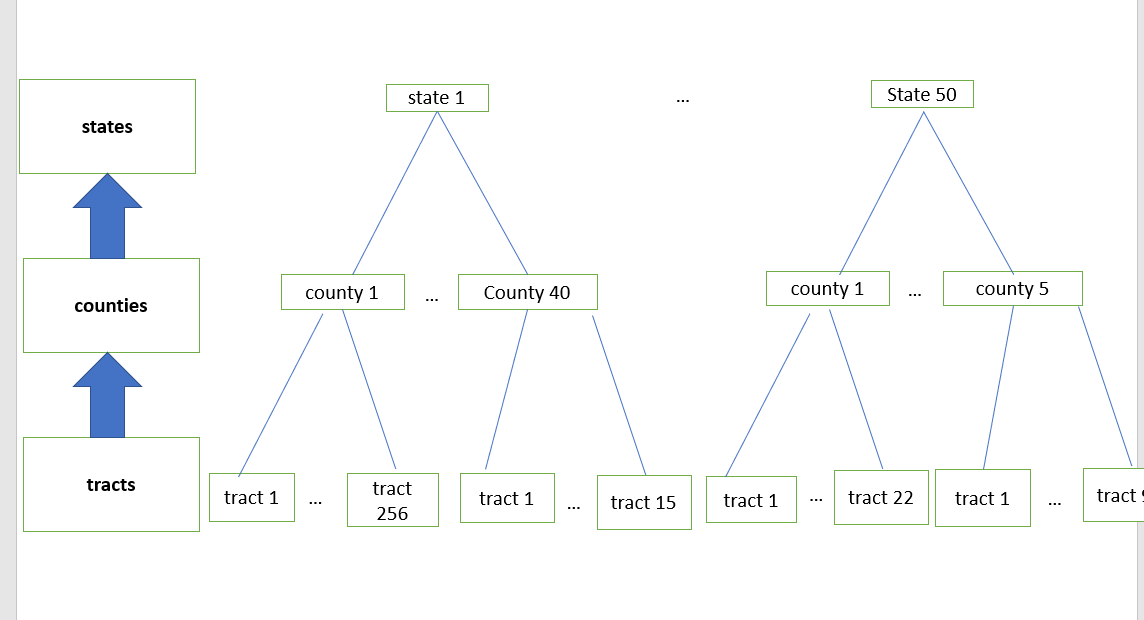

panel, two levels
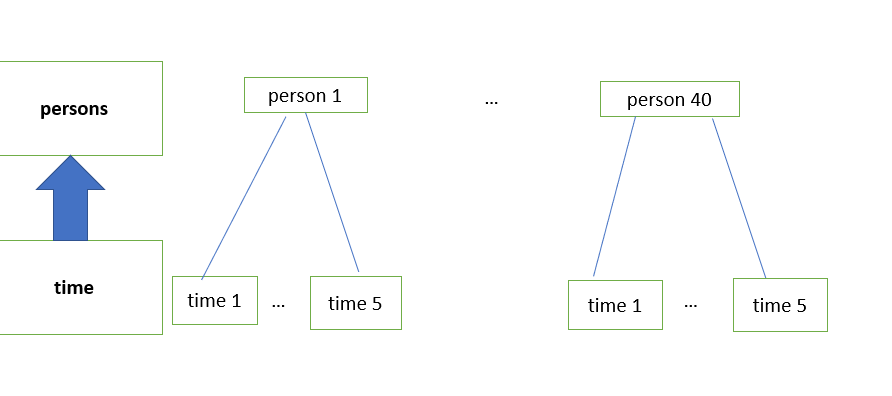

<b> This is how multilevel level data looks like in Stata:</b>
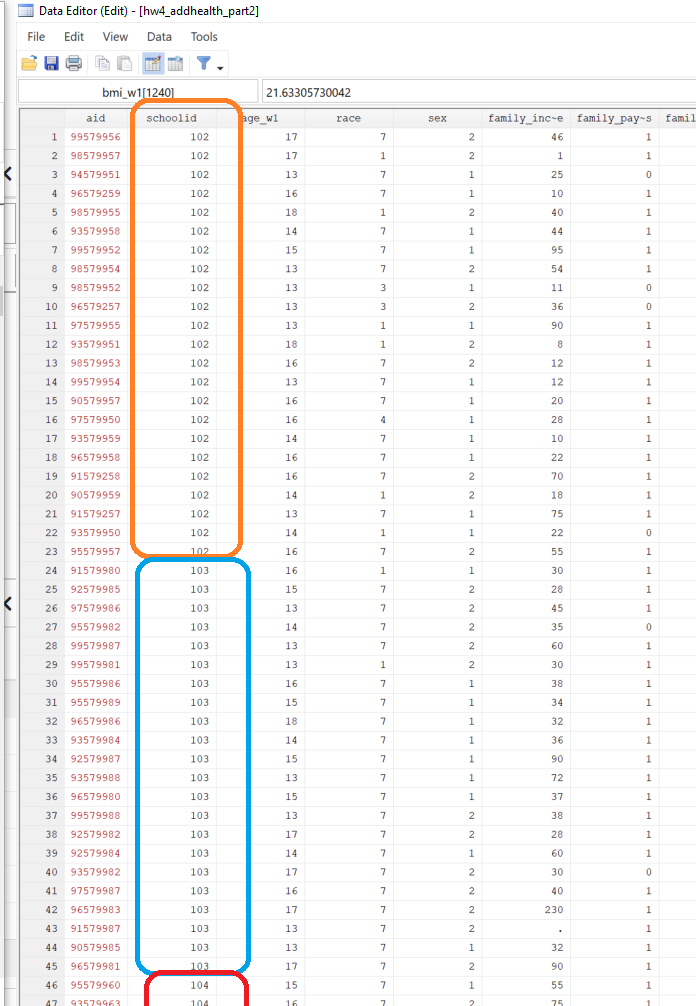

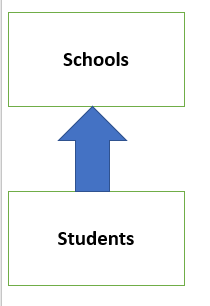

### National Longitudinal Study of Adolescent to Adult Health (ADD Health)
We will be practicing with a subset of the add health data. We will only doing cross-sectional analysese meaning we are only looking at data over a specific time point.

The data is of adolescents (unit of analysis).

<b>aid</b>----individual id (first level--students)

<b>schoolid</b>----school id (second level--schools)

<b>bmi_w1</b>--BMI at wave 1

<b>female</b>---dummy variable of female

<b>age_w1</b>----age at Wave 1

<b>parent_highestedu</b>---parent's highest educational attainment where 1=less than high school; 2=high school; 3=some college; 4=college degree or more

## OLS Regression
In a OLS regression, we have points and we are estimating a model that best represents the relationship between x and y.

$y_i = \beta_0 + \beta_1*x_i + e_i$

where we assume the residuals are normally distributed and have $E(e_i)=0$ and $var(e_i)=\sigma^2$ where $e_i$ ~ $N(0,\sigma^2)$

In [1]:
cd "C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week9"

use "addhealth.dta", clear

*estimates the OLS
regress bmi_w1 i.female age_w1 ib4.parent_highestedu
*makes a yhat (predicted values based on the OLS regression)
predict ols_bmi

*Graphs the actual data AND estimated OLS line
twoway (scatter bmi_w1 age_w1) ///
    (lfit ols_bmi age_w1)
graph export "scatter_line_bmi_w1_age.png", replace width(3400)


C:\Users\acade\Documents\teaching\SOC 211 spring 2023\week9



      Source |       SS           df       MS      Number of obs   =     6,210
-------------+----------------------------------   F(5, 6204)      =     50.14
       Model |  4687.96795         5  937.593589   Prob > F        =    0.0000
    Residual |  116010.991     6,204   18.699386   R-squared       =    0.0388
-------------+----------------------------------   Adj R-squared   =    0.0381
       Total |  120698.959     6,209  19.4393556   Root MSE        =    4.3243

-------------------------------------------------------------------------------
       bmi_w1 | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
--------------+----------------------------------------------------------------
     1.female |  -.2622226    .109896    -2.39   0.017    -.4776567   -.0467884
       age_w1 |    .419081   .0311469    13.45   0.000     .3580223    .4801396
              |
parent_high~u |
           1  |   1.259301   

This model and figure DOES NOT account for the effect schools has on children.

# Why multilevel modeling?
Let's say, we have reason the group the data we ran with OLS. Like we need to group or cluster students within schools because schools have different grade and age levels. In that case, we can give every school it's own intercept or starting point, to account for each school.

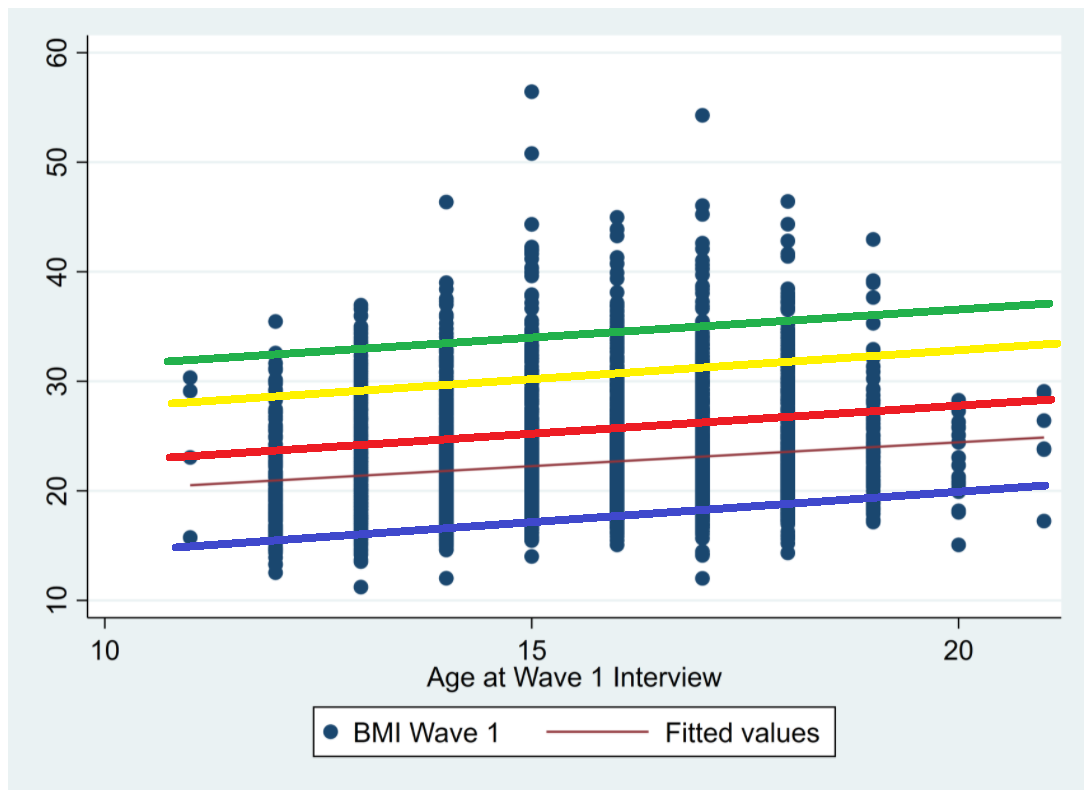

This figure has many different intercepts where some school have higher or lower bmi. The relationship/slope stays the same for every school, but every school has a separate starting point.

### Random intercept model: Mathematics of the model...

This is a random-intercepts model (it is one of the most basic models in multilevel modeling)

Level 1 equation: $y_{ij} = \beta_{0j} + \beta_1*x_{1ij} + e_{0ij} $

Level 2 equation: $\beta_{0j} = \beta_0 + \mu_{0j}$

Combined model: $y_{ij} = (\beta_0 + \mu_{0j}) + \beta_1*x_{1ij} + e_{0ij}$

$y_{ij} = \beta_0 + \beta_1*x_{1ij} + \mu_{0j} + e_{0ij}$

where,

i is for i individual

j is for j school

Fixed part: $\beta_0 + \beta_1$

Random part (Level 2): $[\mu_{0j}]$ ~ $N(0,\sigma^2_{\mu0})$

Random part (Level 1): $[e_{0ij}]$ ~ $N(0,\sigma^2_{e0})$

In [2]:
*This how you run a multilevel model in Stata:
*mixed dependent_var independent_variable || secondlevel:
mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:


Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood = -17871.852  
Iteration 1:   log likelihood = -17871.852  

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =      6,210
Group variable: schoolid                        Number of groups  =        132
                                                Obs per group:
                                                              min =          8
                                                              avg =       47.0
                                                              max =        122
                                                Wald chi2(5)      =     162.00
Log likelihood = -17871.852                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
       bmi_w1 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
--------------+------------

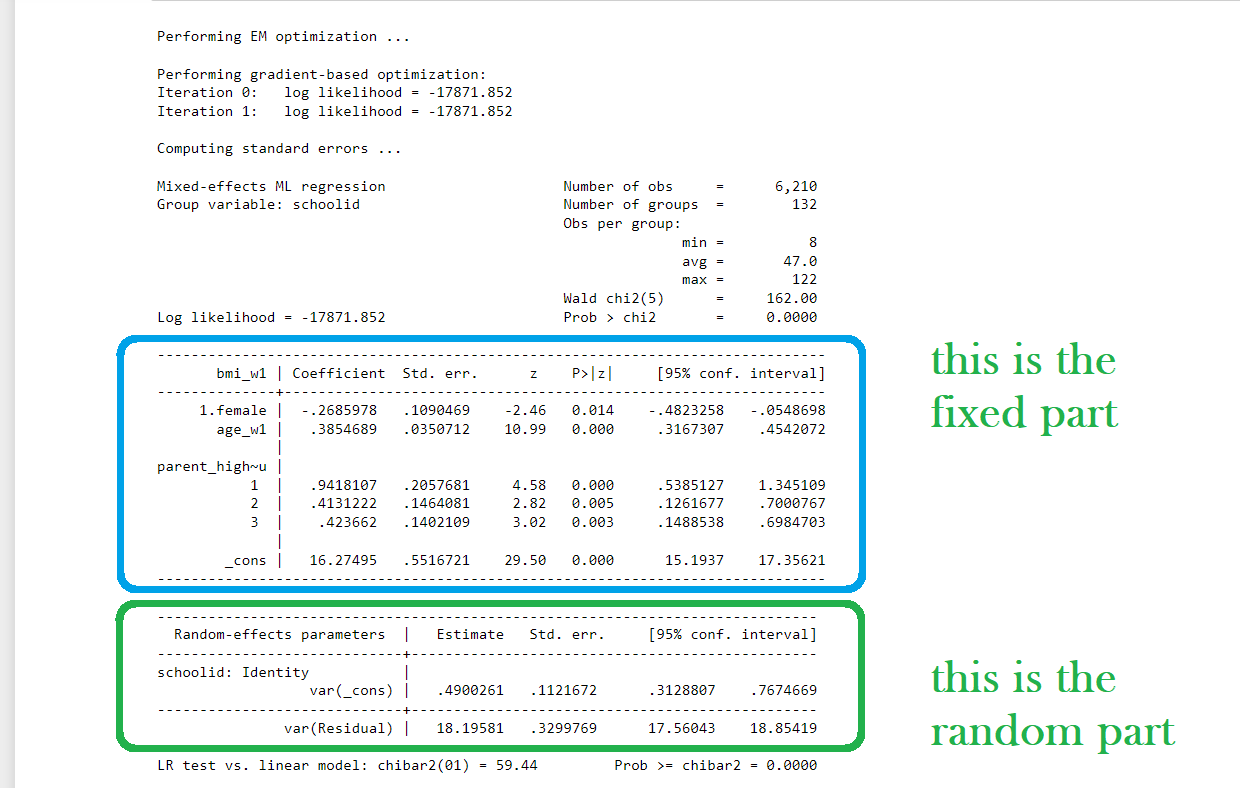

$(BMI) = 16.27495 + -.2685978*x_{female} + .3854689 *x_{age} + .9418107*x_{lessHS} + .4131222*x_{HS} + .423662*x_{sm_coll}$

Here, we find that women report significantly lower BMI as compared to men. As age increases there is a significant increase in BMI. We find BMI significantly decreases as parent's educational attainment increases.

The random effect for the school level: $\sigma^2_{\mu0} = .490$

The random effect for the individual level: $\sigma^2_{e0} = 18.196$

### Intraclass coefficient (ICC)
This test statistic tell you how much the variation of the outcome variable is explained by the second level. 

<center>$ICC = \frac{Variation at Level 2}{Total variation}$

<center>$\frac{variation at level 2}{Variation at level 2 + variation at level 1}$

<center>$ \rho = \frac{\sigma^2_{\mu0}}{\sigma^2_{\mu0}+\sigma^2_{e0}}$

We report ICC as a percent, so mutiple it by 100.

We interpret it by saying, $\rho$ percent of the outcome is explained by the second level. The rule of thumb for a good ICC is 5%.

In the example above,

$\frac{.490}{.490+18.196}=.026$

Here, we find that 2.6% of the variation in BMI is explained by the school level.

In [4]:
di .490/(.490+18.196)

.02622284


In [3]:
*You can also ask stata to estimate the icc.
estat icc


Residual intraclass correlation

------------------------------------------------------------------------------
                       Level |        ICC   Std. err.     [95% conf. interval]
-----------------------------+------------------------------------------------
                    schoolid |   .0262245    .005894      .0168426    .0406164
------------------------------------------------------------------------------


In [3]:
*This how you run a multilevel model in Stata:
*mixed dependent_var independent_variable || secondlevel:
mixed bmi_w1 || schoolid:
estat icc



Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood = -18188.415  
Iteration 1:   log likelihood = -18188.415  

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =      6,291
Group variable: schoolid                        Number of groups  =        132
                                                Obs per group:
                                                              min =          8
                                                              avg =       47.7
                                                              max =        122
                                                Wald chi2(0)      =          .
Log likelihood = -18188.415                     Prob > chi2       =          .

------------------------------------------------------------------------------
      bmi_w1 | Coefficient  Std. err.      z    P>|z|     [95% conf. interval]
-------------+--------------

The ICC is about 5% for the null model.

### Caterpillar plots: Expected values
With multilevel modeling we can plot the expected values of the each school.

In [39]:
use "addhealth.dta", clear
quietly mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:
*This makes the predicted values with school-specific clusters
predict bmi_fixed, fitted
*This makes the standard error for the fixed part predicted values 
predict bmi_fixed_se, stdp
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses




(90 missing values generated)

(90 missing values generated)




In [40]:
*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
gen totse=(bmi_fixed_se+u0_se)*1.96
*calculating the lower 95% CI bound
gen explo=bmi_fixed-totse
*calculating the upper 95% CI bound
gen exphi=bmi_fixed+totse


(90 missing values generated)

(90 missing values generated)

(90 missing values generated)


In [42]:
*The following three lines must be ran together.
sort schoolid
by schoolid: gen selectfromlist= (_n==1)
*to check if code worked
sort selectfromlist

In [ ]:
*These set of commands only keeps school-level data.
keep if selectfromlist==1

sort bmi_fixed
gen plot=_n

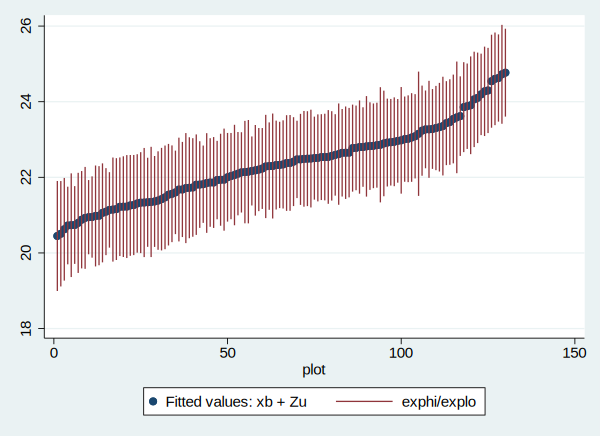




(note: file caterpillar_exp_value_bmi_w1.png not found)
(file caterpillar_exp_value_bmi_w1.png written in PNG format)


In [48]:
twoway ///
    (scatter bmi_fixed plot) ///
    (rspike exphi explo plot)
graph export "caterpillar_exp_value_bmi_w1.png", replace width(3400)

This is such an important figure. The points are the expected value of BMI with the model. The red spikes are the 95% confidence interval. You can see the range of predicted BMI for each school.

In [32]:
sort plot

Open the data and look at the plot and schoolid to see which school has higher or lower predicted BMI.

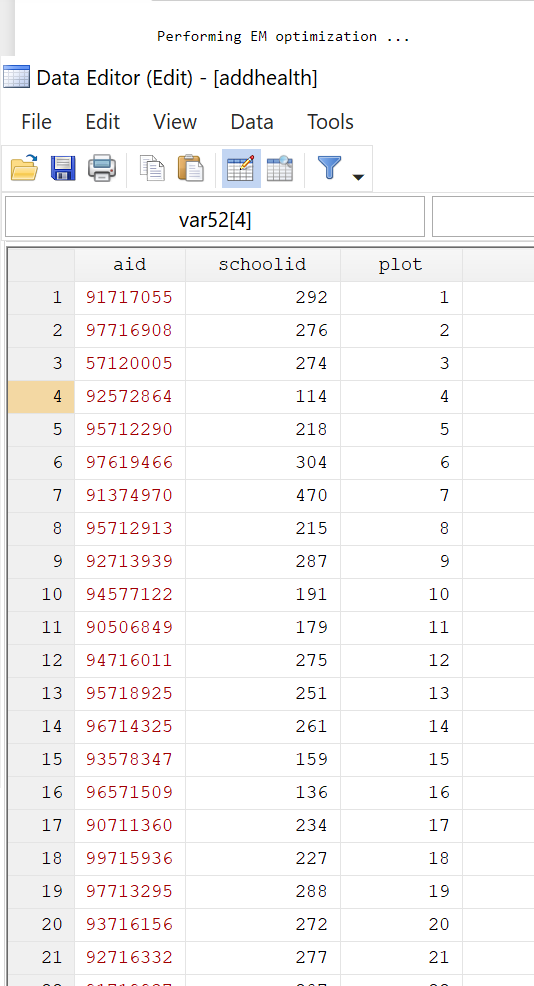

### Caterpillar plots: Random part
With multilevel modeling we can plot the random part of the each school.

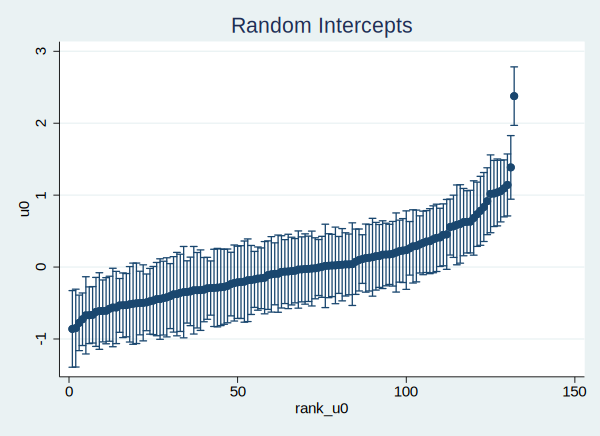











(file caterpillar_rand_inter_bmi_w1_age.png written in PNG format)


In [50]:
use "addhealth.dta", clear
quietly mixed bmi_w1 i.female age_w1 ib4.parent_highestedu || schoolid:
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses
by school, sort: generate graphme = (_n==1)

sort u0
gen rank_u0 = sum(graphme)
serrbar u0 u0_se rank_u0 if graphme, ytitle(u0) title(Random Intercepts)
graph export "caterpillar_rand_inter_bmi_w1_age.png", replace width(3400)

This figure is just the random parts for each school. If the school reports higher than 0, that means they are above the average. If the school reports lower than 0, that means they are below the average. Again we go and check the data.

In [51]:
sort graphme rank_u0

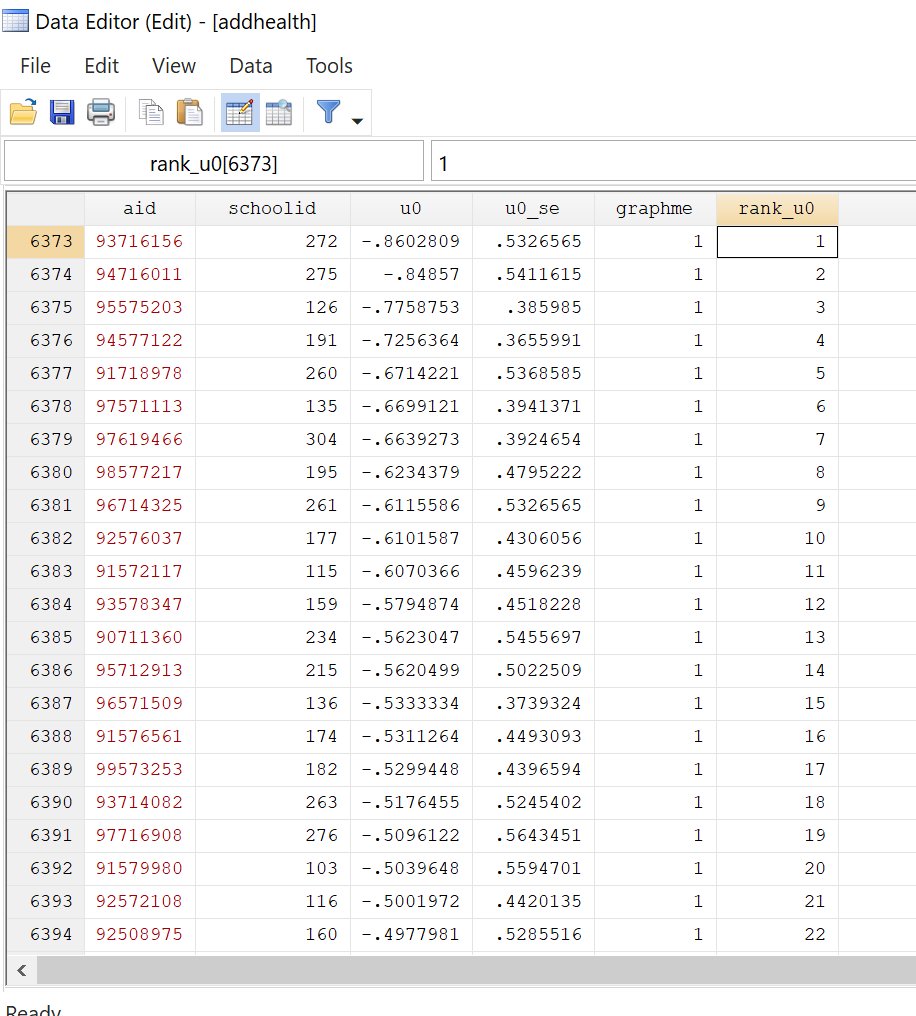

We see here that schoolid=272 has the lowest random part, followed by 275.

## Practice problems

1) Esimtate a two level model of adolecents nested within schools. Outcome variable is depress score (cesd). Independent variables: hrs_sleep, hrs_worked, female, and parent's highest education (where reference category is =4). How many observations and schools are estimated in the model? Interpret the coefficient results. Make sure to re-open the data.

2) Calculate the ICC manually and then check your results with the estat icc command.

3) Use the predict command to estimate and make variables of the fixed and random parts. Make sure to also estimate standard errors of the fixed and random parts.

4) Make a caterpillar plot of the expected value for the every school.

5) Make a caterpillar plot of the random part for the every school.

Answers at the end of the workbook.

# Eco-intersectional multilevel (EIM) modeling
EIM is a modeling approach that uses intersectionality theory and environmental justice to inform the multi-level statistical structure. Intersectionality theory originates in Black feminist scholarship to draw attention to the interlocking, mutually constituted nature of systems of oppression and privilege such as racism, sexism, and socioeconomic inequality. Environmental injustices--defined as the disproportional impacts of environmental pollution of historically marginalized communities--happen at the neighborhood-level because of the placement of industrial facilities, military sites, parks, etc…The mechanism of environmental hazards placement work at the neighborhoods-level with intersecting classed, racialized, gendered, and urbanized dimensions. “Eco-intersectionality” focuses on this neighborhood-level by using census tract as proxy of neighborhood or community. EIM has been used to assess intercategorical air pollution disparities.

<i>“One of the most important indicators of one’s health is one’s street address.” </i> -Robert D. Bullard and Beverly Wright

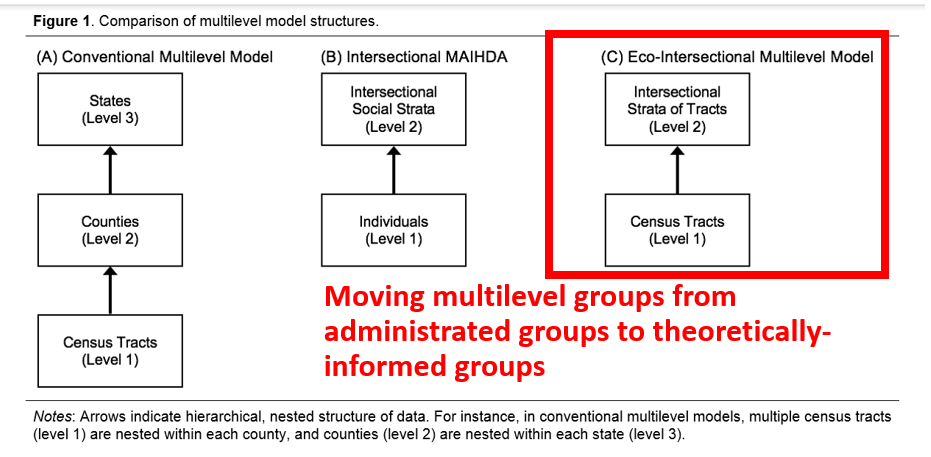

One challenge of using intersectionality theory within quanititiative methods is that as the number of overlapping system of power increases the degrees of freedom are used. In EIM, the clustering are the overlapping groups therefore incorporates the theory into modeling structure. 

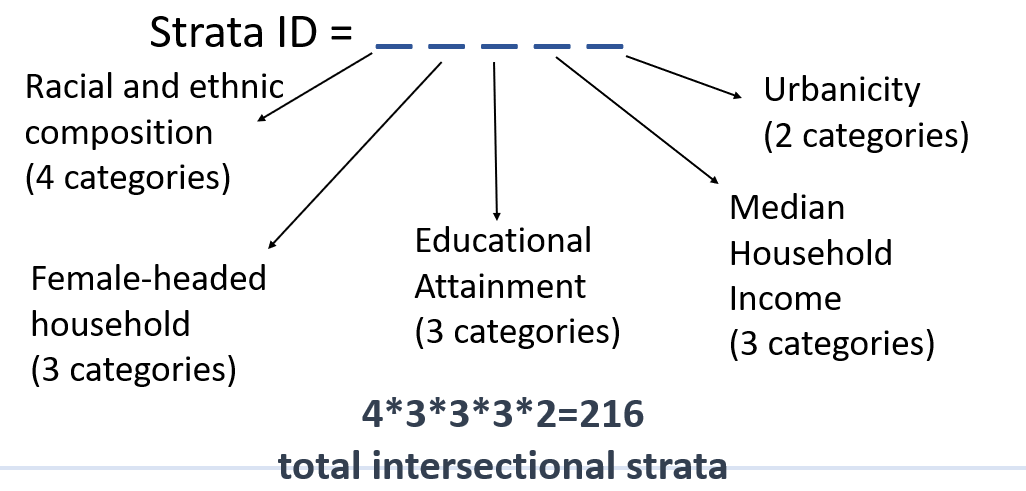

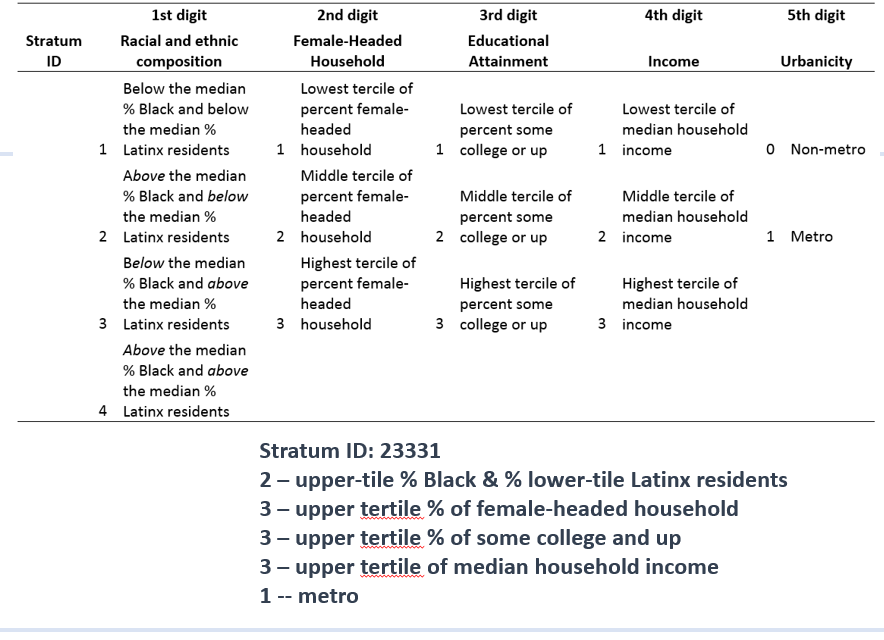

In [4]:
*open eimdata.dta
use eimdata.dta, clear
desc


(ICQCM practice data for workshop)


Contains data from eimdata.dta
 Observations:        71,103                  ICQCM practice data for workshop
    Variables:            14                  16 Jul 2021 15:01
--------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
--------------------------------------------------------------------------------
mhhincome       long    %12.0g                Median household income
blk_ntlatper    float   %9.0g                 % Black residents
latper          float   %9.0g                 % Latinx residents
fhh             float   %9.0g                 % female-headed household
smcollnupper    float   %9.0g                 % of residents with some college
                                                or more
cancerrisk      double  %10.0g                Total Cancer Risk (per million)
metro           float   %9.0g           

We can the data includes various social demographic variables (such as % female-headed household, median age, etc...). The dependent variable we will using in this example is cancerrisk which is the estimated cancer risk from air toxics per million persons.

## Making terciles of the data
We need to calculate dotiles and terciles of the variables we want have in our intersectional strata. In this example, the intersectional strata will be:

% Black residents & % Latinx residents
% female-headed household
median household income
% of residents with some college or more
metro
For the race/ethnicity dimension, we will create do-tiles of % Black and Latinx residents. Then make four categories of the combinations of the do-tiles.

In [5]:
*creates two quantiles (aka do-tiles)
xtile blk_ntlatper_med = blk_ntlatper, nq(2)
xtile latper_med = latper, nq(2)

In [6]:
*creates the race variable based on do-tiles of blk_ntlatper and latper
*1 means below the median % of the group and 2 means above the median % of the group 
gen race=.
replace race=1 if blk_ntlatper_med==1 & latper_med==1
replace race=2 if blk_ntlatper_med==2 & latper_med==1
replace race=3 if blk_ntlatper_med==1 & latper_med==2
replace race=4 if blk_ntlatper_med==2 & latper_med==2


(71,103 missing values generated)

(20,273 real changes made)

(15,279 real changes made)

(15,279 real changes made)

(20,272 real changes made)


intersectional strata:

* % Black residents & % Latinx residents (DONE)
* % female-headed household
* median household income
* % of residents with some college or more
* metro (DONE)

### Next, we calculate the terciles of: female-headed household, median household income, and educational attainment.
Where 1 means lower percentile, 2 is middle, and 3 is upper percentile.

In [7]:
xtile fhh_ter = fhh, nq(3)
xtile smcollnupper_ter = smcollnupper, nq(3)
xtile mhhincome_ter = mhhincome, nq(3)

intersectional strata will be:

* % Black residents & % Latinx residents (DONE)
* % female-headed household (DONE)
* median household income (DONE)
* % of residents with some college or more (DONE)
* metro (DONE)

metro is coded as a binary where 0 means the tract is not in a metro and 1 means the tract is in metro.

### Now, we make a variable concatenating each corresponding value for each census tract.

In [8]:
egen strata_str= concat( race fhh_ter smcollnupper_ter mhhincome_ter metro)
encode strata_str, g(strata)
label var strata "Intersectional strata ID"

In [9]:
*We can check a random observation to make sure it worked
summ mhhincome blk_ntlatper latper fhh smcollnupper
list in 35074



    Variable |        Obs        Mean    Std. dev.       Min        Max
-------------+---------------------------------------------------------
   mhhincome |     71,103    57273.92    28472.88       2499     250001
blk_ntlatper |     71,103    13.37071    21.92066          0        100
      latper |     71,103    15.64994    21.14894          0        100
         fhh |     71,103    13.64217    8.707457          0   87.27915
smcollnupper |     71,103    57.13329    17.81199   4.737609        100


       +---------------------------------------------------------------------+
35074. | mhhinc~e | blk_nt~r |   latper |      fhh  | smco~per  | cancerr~k  |
       |    55833 | 2.708075 | 38.31056 | 22.09469  | 53.01933  | 31.018535  |
       |---------------------------------------------------------------------|
       | metro  | c_~10000  | c_media~e  | c_unem~r  | c_rent~r  | c_manu~r  |
       |     1  | 16.13082  | -3.851338  | 2.488935  | 24.38382  | 2.312608  |
       |----------

In [10]:
save eimdata_strata.dta, replace

file eimdata_strata.dta saved


### Looking at the distribution of the strata
It is important to look at the sample sizes across the strata. A good rule of thumb is most of strata (70% or more) should have 30 of more. Because 30 is where central limit theorem starts to come into play.

In [11]:
use eimdata_strata.dta, clear

(ICQCM practice data for workshop)


In [12]:
*create a count variable and then collapse data based on strata groups.
gen count=1
collapse (sum) count, by(strata)

In [13]:
*We can see a breakdown of the sample sizes across the strata
list


     +----------------+
     | strata   count |
     |----------------|
  1. |  11110     516 |
  2. |  11111     218 |
  3. |  11120     769 |
  4. |  11121     519 |
  5. |  11130      30 |
     |----------------|
  6. |  11131     123 |
  7. |  11210     282 |
  8. |  11211     179 |
  9. |  11220    1174 |
 10. |  11221     963 |
     |----------------|
 11. |  11230     199 |
 12. |  11231    1156 |
 13. |  11310      47 |
 14. |  11311     147 |
 15. |  11320     210 |
     |----------------|
 16. |  11321     591 |
 17. |  11330     211 |
 18. |  11331    4435 |
 19. |  12110     841 |
 20. |  12111     408 |
     |----------------|
 21. |  12120     487 |
 22. |  12121     645 |
 23. |  12130       8 |
 24. |  12131      59 |
 25. |  12210     342 |
     |----------------|
 26. |  12211     185 |
 27. |  12220     535 |
 28. |  12221    1067 |
 29. |  12230      53 |
 30. |  12231     648 |
     |----------------|
 31. |  12310      29 |
 32. |  12311      40 |
 33. |  12320  

In [14]:
qui{
    *Here makes categorizes the observation based on their sample size
    gen strata_size1=0
    replace strata_size1 = 1 if count>=1
    gen strata_size5=0
    replace strata_size5 = 1 if count>=5
    gen strata_size10=0
    replace strata_size10 = 1 if count>=10
    gen strata_size20=0
    replace strata_size20 = 1 if count>=20
    gen strata_size30=0
    replace strata_size30 = 1 if count>=30
    gen strata_size50=0
    replace strata_size50 = 1 if count>=50
    gen strata_size100=0
    replace strata_size100 = 1 if count>=100
    
    *collapses based on categories made above
    collapse (sum) strata_size1 strata_size5 strata_size10 strata_size20 strata_size30 strata_size50 strata_size100
    gen id=1
    
    *inverses (reshapes) the data matrix
    reshape long strata_size, i(id) j(sample_size)
    
    *creates a percent of sample size
    gen size_percent=(strata_size/216)*100
}

In [15]:
list sample_size strata_size size_percent, noobs divider separator(7) abbreviate(15)


  +------------------------------------------+
  | sample_size | strata_size | size_percent |
  |-------------+-------------+--------------|
  |           1 |         216 |          100 |
  |           5 |         196 |     90.74074 |
  |          10 |         186 |     86.11111 |
  |          20 |         171 |     79.16666 |
  |          30 |         160 |     74.07407 |
  |          50 |         144 |     66.66666 |
  |         100 |         118 |     54.62963 |
  +------------------------------------------+


Here we see that at 74% of strata have 30 or more observations.

In [16]:
use eimdata_strata.dta, clear

(ICQCM practice data for workshop)


In [17]:
* preparing data for analysis
qui {
*** Construct Constant Vector for use in MLwinN ***
    gen cons = 1
    gen denominator = 1
*creates dummy variables for each tercile because we will need to use them in the models later    
    rename strata stratum
    tabulate race, gen(dum)
        rename dum1 lowblk_lowlat
        rename dum2 highblk_lowlat
        rename dum3 lowblk_highlat
        rename dum4 highblk_highlat
    tabulate fhh_ter, gen(dum)
        rename dum1 low_fhh
        rename dum2 med_fhh
        rename dum3 high_fhh
    tabulate smcollnupper_ter, gen(dum)
        rename dum1 low_smcollnup
        rename dum2 med_smcollnup
        rename dum3 high_smcollnup
    tabulate mhhincome_ter, gen(dum)
        rename dum1 low_mhhincome
        rename dum2 med_mhhincome
        rename dum3 high_mhhincome
*Save a new data
    save eimready.dta, replace
}

This block of code makes a data file with only 216 stratum. The block of code must ran together.

In [18]:
qui{
    use eimready.dta, clear
    by stratum, sort: generate selectfromlist = (_n==1)
    drop if selectfromlist ==0 
    keep stratum race fhh_ter smcollnupper_ter mhhincome_ter metro ///
        highblk_lowlat lowblk_highlat highblk_highlat med_fhh high_fhh med_smcollnup high_smcollnup med_mhhincome high_mhhincome metro
    save modeldata.dta, replace
}

In [21]:
*Running the nullmodel with Frequentist approach
use "eimready.dta", clear
mixed cancerrisk || stratum:
estat icc


(ICQCM practice data for workshop)


Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood = -278244.16  
Iteration 1:   log likelihood = -278244.16  

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =     71,103
Group variable: stratum                         Number of groups  =        216
                                                Obs per group:
                                                              min =          1
                                                              avg =      329.2
                                                              max =      4,600
                                                Wald chi2(0)      =          .
Log likelihood = -278244.16                     Prob > chi2       =          .

------------------------------------------------------------------------------
  cancerrisk | Coefficient  Std. err.      z    P>|z|     [95% conf. in

In [22]:
*Running the model with the Frequentist approach
use eimready.dta, clear
mixed cancerrisk highblk_lowlat lowblk_highlat highblk_highlat med_fhh high_fhh ///
    med_smcollnup high_smcollnup med_mhhincome high_mhhincome metro || stratum:
estat icc


(ICQCM practice data for workshop)


Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood = -278086.27  
Iteration 1:   log likelihood = -278086.27  

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =     71,103
Group variable: stratum                         Number of groups  =        216
                                                Obs per group:
                                                              min =          1
                                                              avg =      329.2
                                                              max =      4,600
                                                Wald chi2(10)     =     868.00
Log likelihood = -278086.27                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
   cancerrisk | Coefficient  Std. err.      z    P>|z|     [95% conf. 

In [23]:
qui{
*calculates expected value (fixed and random effects)
    predict exp, fitted relevel(stratum)
*calculates the standard error of random effects 
    predict u0_se, reses
*calculate the standard error of the fixed effect portion
    predict fixed_se, stdp
*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
    gen totse=(fixed_se+u0_se)*1.96
*calculating the lower 95% CU bound
    gen explo=exp-totse
*calculating the upper 95% CU bound
    gen exphi=exp+totse
    by stratum, sort: generate dup = (_n==1)
    drop if dup==0
    drop mhhincome blk_ntlatper latper fhh smcollnupper cancerrisk metro c_medhouval10000 ///
    c_medianage c_unemployper c_rentper c_manuper c_housyrbuilt70per dup
    sort exp
    gen rank_exp = _n

    merge 1:1 stratum using "modeldata.dta", nogenerate assert(match)
    save "modelBresults_freq.dta", replace
}

# making caterpillar plot
First, with the frequentist results. We can look make a table showing the expected values for each stratum and their expected value ranking.

In [24]:
use "modelBresults_freq.dta", clear
list stratum exp explo exphi rank_exp


(ICQCM practice data for workshop)


     +-----------------------------------------------------+
     | stratum        exp      explo      exphi   rank_exp |
     |-----------------------------------------------------|
  1. |   11110   24.19893   22.14712   26.25073         41 |
  2. |   11111   28.67759   26.11702   31.23816         90 |
  3. |   11120   21.97323   20.09087   23.85559         21 |
  4. |   11121    26.6868   24.61514   28.75847         60 |
  5. |   11130   21.56217   17.48055   25.64379         17 |
     |-----------------------------------------------------|
  6. |   11131    26.2761   23.28273   29.26948         56 |
  7. |   11210    20.3225   17.94719   22.69781         10 |
  8. |   11211   28.81251   26.12564   31.49938         91 |
  9. |   11220    19.4685   17.75383   21.18316          2 |
 10. |   11221   25.18161   23.38605   26.97718         45 |
     |-----------------------------------------------------|
 11. |   11230   19.44669   16.78728   22.10609

     |-----------------------------------------------------|
111. |   31120   23.54881   20.42594   26.67168         35 |
112. |   31121    32.1028   29.29046   34.91513        140 |
113. |   31130   23.97173   19.38596    28.5575         40 |
114. |   31131   31.10458   27.14817   35.06099        128 |
115. |   31210   22.08555   18.79356   25.37754         25 |
     |-----------------------------------------------------|
116. |   31211   30.19827   27.35239   33.04416        115 |
117. |   31220   20.99458   18.56561   23.42355         15 |
118. |   31221   31.47561   29.32799   33.62322        131 |
119. |   31230   20.70185   17.09411    24.3096         12 |
120. |   31231   30.84978   28.73187   32.96769        127 |
     |-----------------------------------------------------|
121. |   31310   22.05447   17.84329   26.26564         23 |
122. |   31311   30.60365   27.79537   33.41193        120 |
123. |   31320   20.97748   17.39557    24.5594         14 |
124. |   31321   30.3530

In [25]:
*This makes caterpillar plot with freq data
use "modelBresults_freq.dta", clear
/* without labels */
twoway (scatter exp rank_exp, xscale(range(1, 108)) mcolor(black) msymbol(smcircle)) ///
    (rspike exphi explo rank_exp, lcolor(black)) ////
    , ////
    graphregion(margin(small)) ///
    ytitle("Predicted Cancer Risk", size(large)) ///
    ylabel(15 20 25 30 35 40 45 50 55, angle(horizontal) format(%9.2f) labsize(large)) ///
    yline( 15 20 25 30 35 40 45 50 55, lwidth(vthin) lcolor(gray)) ///
    xtitle("Stratum Rank", size(large)) ///
    xlabel(1 50 100 150 200 216, labsize(large)) ///
    xsize(12) ///
    legend(off) ///
    scheme(s1mono)
graph export "Fig_MB_ExpValvsRank_freq.png", replace width(3400)


(ICQCM practice data for workshop)


file C:/Users/acade/.stata_kernel_cache/graph1.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph1.pdf saved as PDF format

(file Fig_MB_ExpValvsRank_freq.png not found)
file Fig_MB_ExpValvsRank_freq.png saved as PNG format


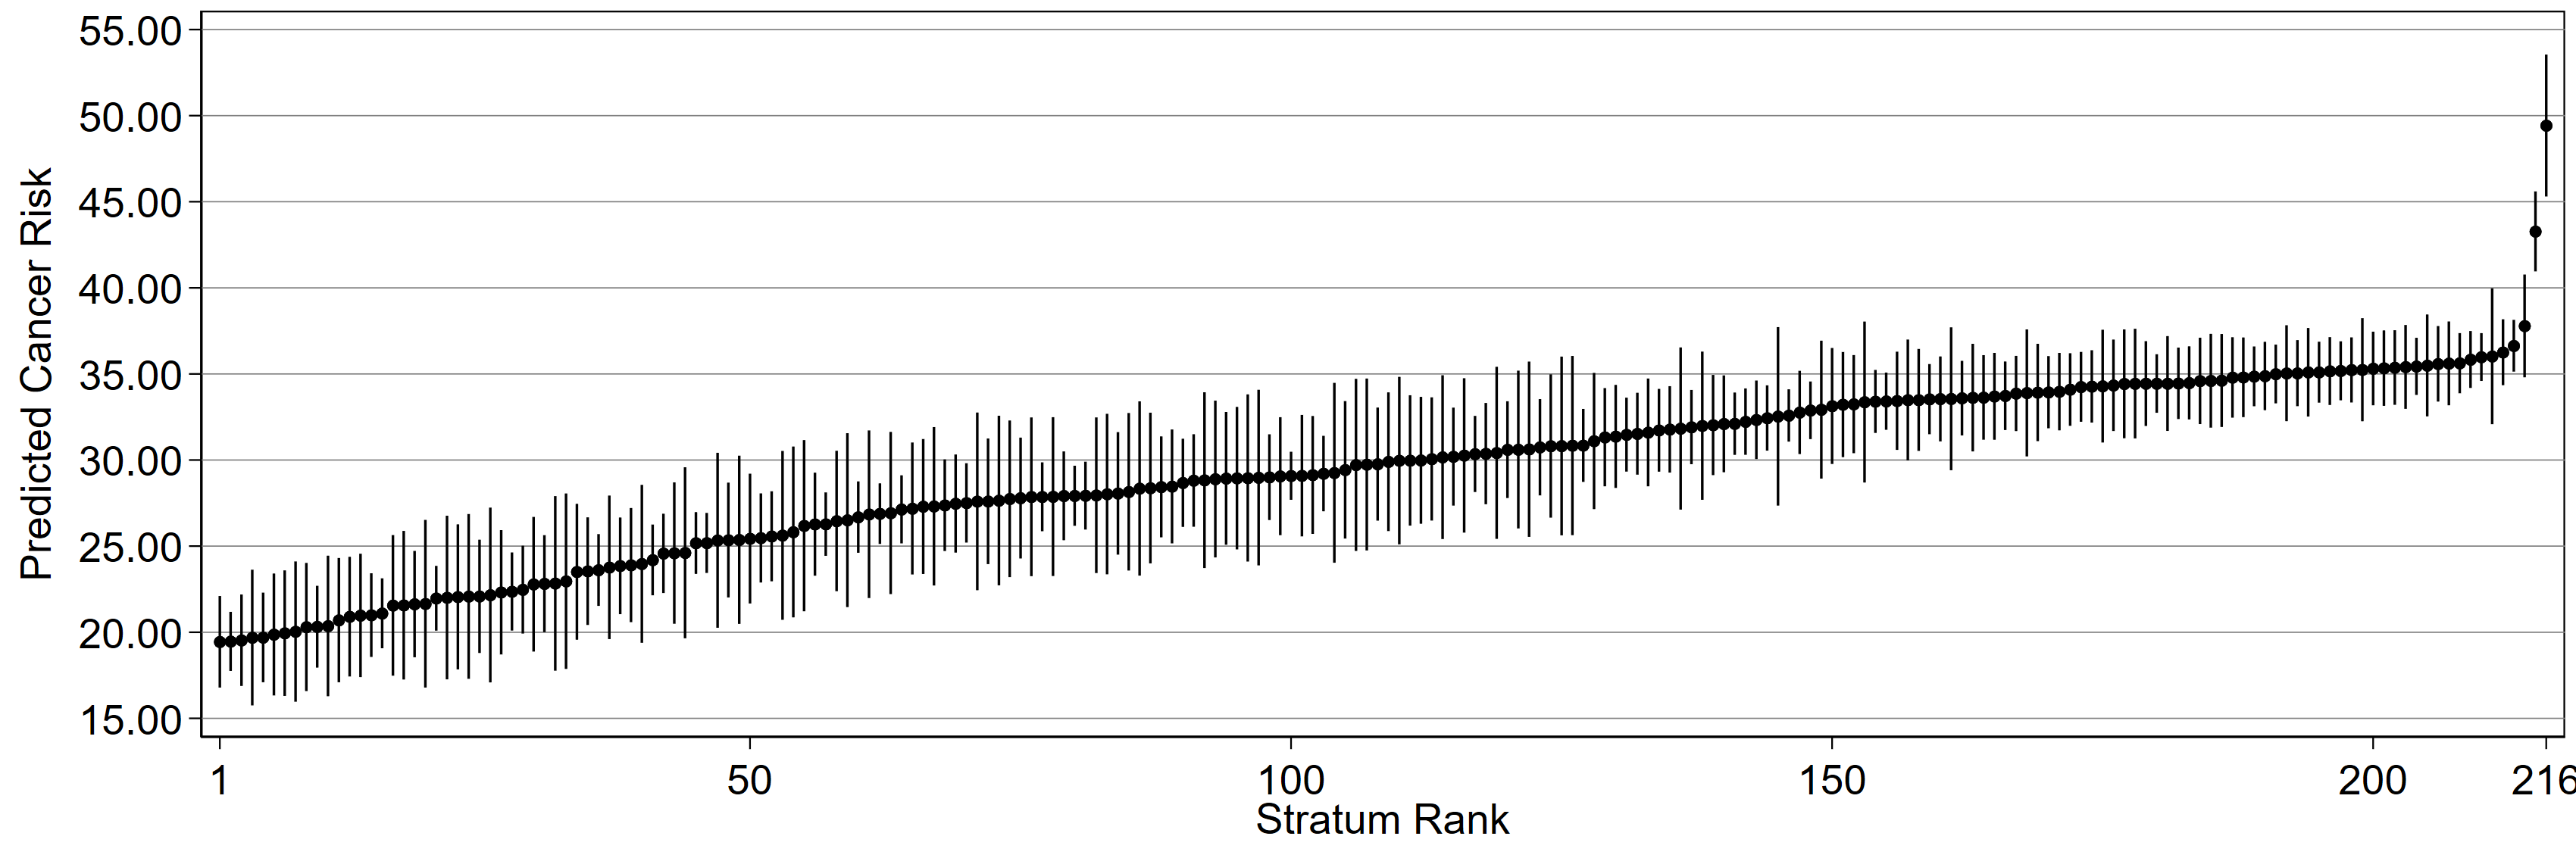

In [26]:
*Make top ten lowest and highest of predicted value
qui{
    use "modelBresults_freq.dta", clear
    gen keepforplot = .
    replace keepforplot = 1 if rank_exp > 206
    replace keepforplot = 1 if rank_exp < 11
    drop if keepforplot == .
    gen plotorder = .
    replace plotorder = 1 if rank_exp == 1
    replace plotorder = 2 if rank_exp == 2
    replace plotorder = 3 if rank_exp == 3
    replace plotorder = 4 if rank_exp == 4
    replace plotorder = 5 if rank_exp == 5
    replace plotorder = 6 if rank_exp == 6
    replace plotorder = 7 if rank_exp == 7
    replace plotorder = 8 if rank_exp == 8
    replace plotorder = 9 if rank_exp == 9
    replace plotorder = 10 if rank_exp == 10
    replace plotorder = 11 if rank_exp == 207
    replace plotorder = 12 if rank_exp == 208
    replace plotorder = 13 if rank_exp == 209
    replace plotorder = 14 if rank_exp == 210
    replace plotorder = 15 if rank_exp == 211
    replace plotorder = 16 if rank_exp == 212
    replace plotorder = 17 if rank_exp == 213
    replace plotorder = 18 if rank_exp == 214
    replace plotorder = 19 if rank_exp == 215
    replace plotorder = 20 if rank_exp == 216
}

twoway ///
    (scatter exp plotorder, mcolor(black) msymbol(circle) mlabel(stratum) mlabposition(12) mlabangle(90) mlabgap(12) mlabsize(medium)) ///
    (rspike exphi explo plotorder, lcolor(black)), ////
    ytitle("Predicted Cancer Risk", size(large)) ///
    text(57 5 "Ten Lowest", place(c)) ///
    text(57 15 "Ten Highest", place(c)) ///
    ylabel( 15 20 25 30 35 40 45 50 55 60, angle(horizontal) format(%9.2f) labsize(large)) ///
    yline( 15 20 25 30 35 40 45 50 55 60, lwidth(vthin) lcolor(gray)) ///
    xtitle("Stratum Rank", size(large)) ///
    xlabel(, nolabel notick) ///
    xline(10.3, lwidth(thin)) ///
    legend(off) ///
    scheme(s1mono)
graph export "Fig_MB_ExpValvsRank_TOPTENS_freq.png", replace width(3400)



. cap noi twoway     (scatter exp plotorder, mcolor(black) msymbol(circle) mlabe
> l(stratum) mlabposition(12) mlabangle(90) mlabgap(12) mlabsize(medium))     (r
> spike exphi explo plotorder, lcolor(black)),     ytitle("Predicted Cancer Risk
> ", size(large))     text(57 5 "Ten Lowest", place(c))     text(57 15 "Ten High
> est", place(c))     ylabel( 15 20 25 30 35 40 45 50 55 60, angle(horizontal) f
> ormat(%9.2f) labsize(large))     yline( 15 20 25 30 35 40 45 50 55 60, lwidth(
> vthin) lcolor(gray))     xtitle("Stratum Rank", size(large))     xlabel(, nola
> bel notick)     xline(10.3, lwidth(thin))     legend(off)     scheme(s1mono)

. if _rc == 0 {
.     noi gr export `"C:/Users/acade/.stata_kernel_cache/graph$stata_kernel_grap
> h_counter.svg"', width(600) replace
file C:/Users/acade/.stata_kernel_cache/graph2.svg saved as SVG format
.     noi gr export `"C:/Users/acade/.stata_kernel_cache/graph$stata_kernel_grap
> h_counter.pdf"', replace
file C:/Users/acade/.stata_kernel_cac

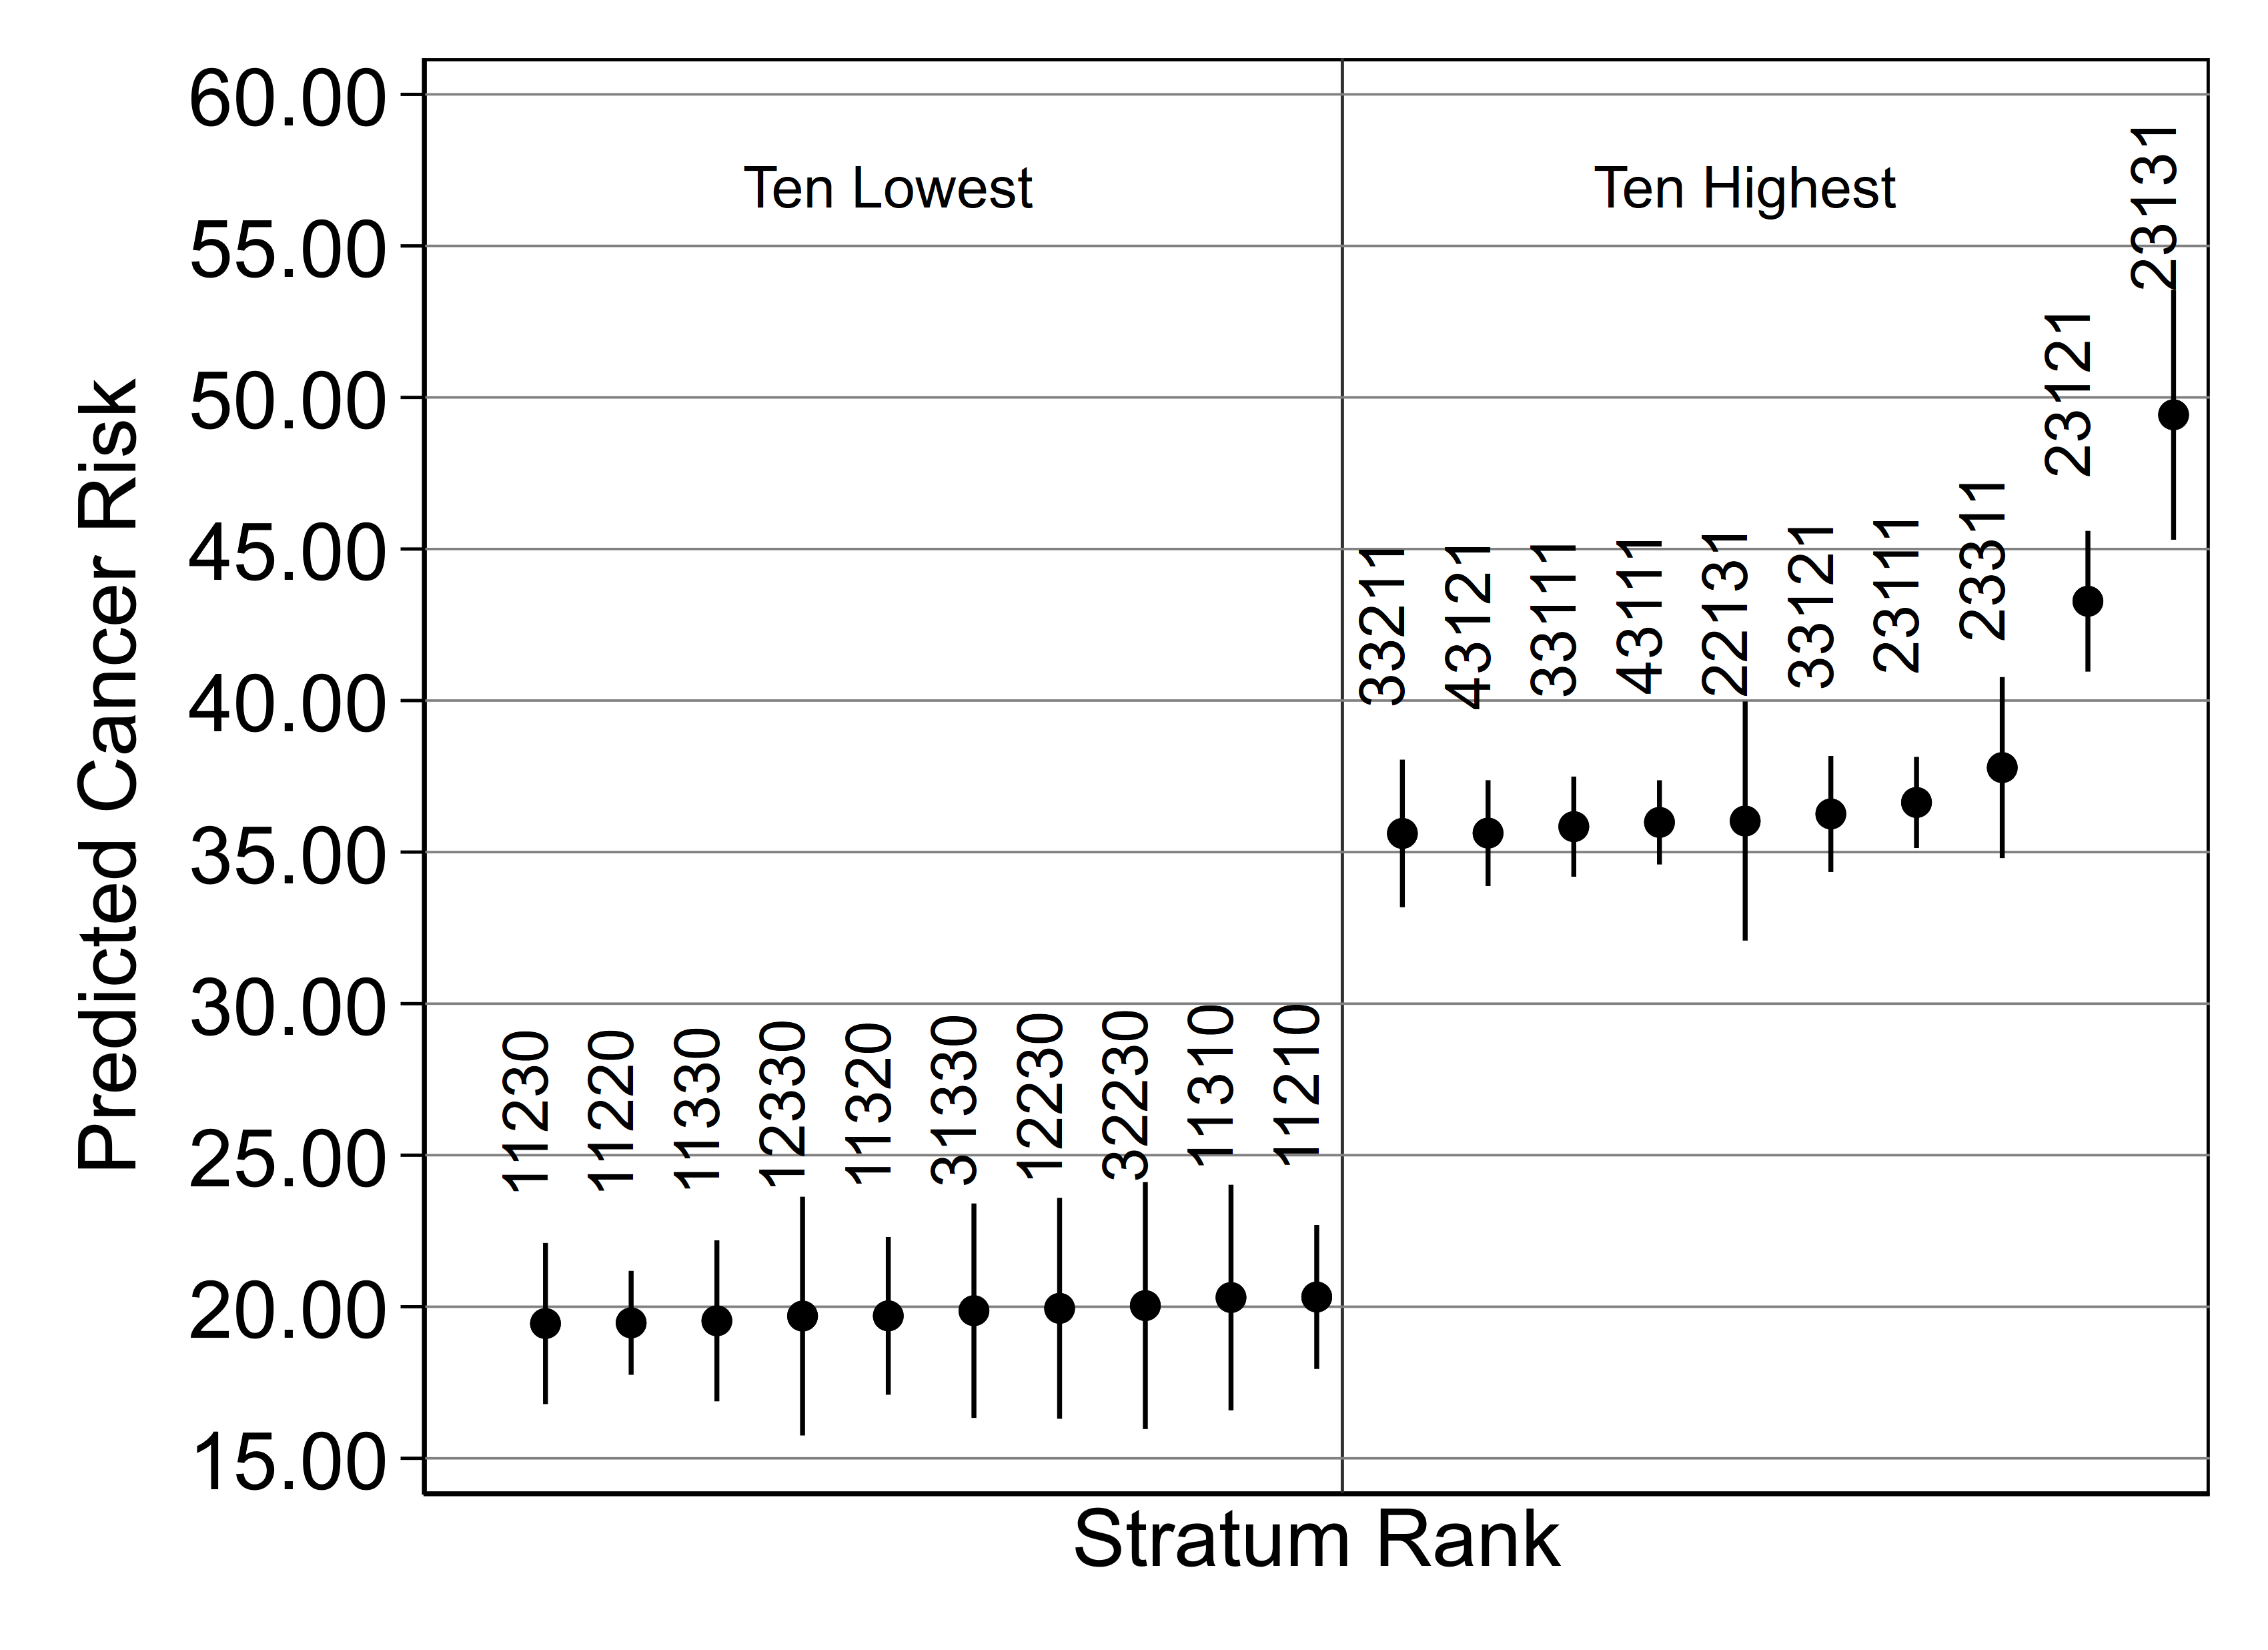

read publications explaining EIM more:

Social Science & Medicine: https://www.sciencedirect.com/science/article/pii/S0277953620307784

Health & Place: https://www.sciencedirect.com/science/article/pii/S1353829222001472

# EIM PRACTICE
* Using the eimdata.dta to make a new strata_econ with the following:
* first digit as terciles of median household income
* second digit as terciles of some college and more
* third digit as metro
* Then, estimate a EIM null model using the strata_econ as the second level with cancerrisk as the dependent variable. Calculate the ICC.
* Then, estimate a EIM model with the additive fixed effects. Estimate the ICC.
* Create a caterpillar plot.

# ADDHEALTH PRACTICE

In [54]:
*If you use the same variable names as earlier, you should re-open the data.
use "addhealth.dta", clear
mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:




Performing EM optimization: 

Performing gradient-based optimization: 

Iteration 0:   log likelihood = -20876.879  
Iteration 1:   log likelihood = -20876.877  
Iteration 2:   log likelihood = -20876.877  

Computing standard errors:

Mixed-effects ML regression                     Number of obs     =      6,334
Group variable: schoolid                        Number of groups  =        132

                                                Obs per group:
                                                              min =         12
                                                              avg =       48.0
                                                              max =        122

                                                Wald chi2(6)      =     345.44
Log likelihood = -20876.877                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
         cesd |      Coef.   Std. Err.      z    P>|z|     [95

There are 6,334 observations in the data and 132 schools. We find that women are significantly more likely to have higher depression scores. Additionally, the is a significant negative relationship between hours sleep and depression where as the hours of sleep decreases there is a corresponding increase in depression score. The results report that as the number of hours worked increases there is a significant increase in depression score. Finally, respondents with lower parent's educational attainment report more depression (significant).

In [24]:
di .6285128/(.6285128+42.23385)

.01466351


In [25]:
estat icc


Residual intraclass correlation

------------------------------------------------------------------------------
                       Level |        ICC   Std. Err.     [95% Conf. Interval]
-----------------------------+------------------------------------------------
                    schoolid |   .0146635   .0044567      .0080645    .0265179
------------------------------------------------------------------------------


The ICC is 1.5% showing there isn't much clustering of the outcome variable happening at the school level.




(168 missing values generated)

(168 missing values generated)



(168 missing values generated)

(168 missing values generated)

(168 missing values generated)




(6,372 observations deleted)


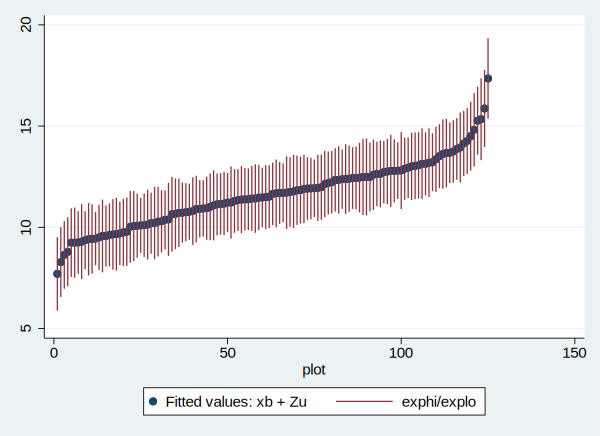






(file caterpillar_exp_value_cesd.png written in PNG format)


In [53]:
*If you use the same variable names as earlier, you should re-open the data.
use "addhealth.dta", clear
quietly mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:

*This makes the predicted values with school-specific clusters
predict cesd_fixed, fitted
*This makes the standard error for the fixed part predicted values 
predict cesd_fixed_se, stdp
*This estimates the random part of school and individual
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses

*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
gen totse=(cesd_fixed_se+u0_se)*1.96
*calculating the lower 95% CU bound
gen explo=cesd_fixed-totse
*calculating the upper 95% CU bound
gen exphi=cesd_fixed+totse

*The following three lines must be ran together.
sort schoolid
by schoolid: gen selectfromlist= (_n==1)
*to check if code worked
sort selectfromlist

keep if selectfromlist==1

sort cesd_fixed
gen plot=_n

twoway ///
    (scatter cesd_fixed plot) ///
    (rspike exphi explo plot)
graph export "caterpillar_exp_value_cesd.png", replace width(3400)

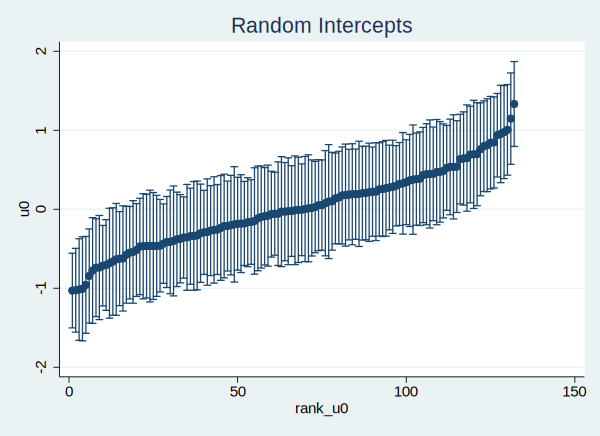











(note: file caterpillar_random_part_cesd.png not found)
(file caterpillar_random_part_cesd.png written in PNG format)


In [56]:
use "addhealth.dta", clear
quietly mixed cesd i.female hrs_sleep hrs_worked ib4.parent_highestedu || schoolid:
predict u0, reffects
*This calculates the standard errors of the random part
predict u0_se, reses
by school, sort: generate graphme = (_n==1)

sort u0
gen rank_u0 = sum(graphme)
serrbar u0 u0_se rank_u0 if graphme, ytitle(u0) title(Random Intercepts)
graph export "caterpillar_random_part_cesd.png", replace width(3400)

# EIM PRACTICE

In [36]:
*open eimdata.dta
use eimdata.dta, clear
xtile smcollnupper_ter = smcollnupper, nq(3)
xtile mhhincome_ter = mhhincome, nq(3)


(ICQCM practice data for workshop)




In [37]:
egen strata_econ_str= concat( mhhincome_ter smcollnupper_ter metro)
encode strata_econ_str, g(strata_econ)
label var strata_econ "Intersectional strata ID econ"

In [38]:
save eimdata_strata_practice.dta, replace

file eimdata_strata_practice.dta saved


In [39]:
*checking distribution of econ strata
use eimdata_strata_practice.dta, clear
*create a count variable and then collapse data based on strata groups.
gen count=1
collapse (sum) count, by(strata_econ)


(ICQCM practice data for workshop)




In [40]:
qui{
    *Here makes categorizes the observation based on their sample size
    gen strata_size1=0
    replace strata_size1 = 1 if count>=1
    gen strata_size5=0
    replace strata_size5 = 1 if count>=5
    gen strata_size10=0
    replace strata_size10 = 1 if count>=10
    gen strata_size20=0
    replace strata_size20 = 1 if count>=20
    gen strata_size30=0
    replace strata_size30 = 1 if count>=30
    gen strata_size50=0
    replace strata_size50 = 1 if count>=50
    gen strata_size100=0
    replace strata_size100 = 1 if count>=100
    
    *collapses based on categories made above
    collapse (sum) strata_size1 strata_size5 strata_size10 strata_size20 strata_size30 strata_size50 strata_size100
    gen id=1
    
    *inverses (reshapes) the data matrix
    reshape long strata_size, i(id) j(sample_size)
    
    *creates a percent of sample size
    gen size_percent=(strata_size/216)*100
}

In [41]:
list sample_size strata_size size_percent, noobs divider separator(7) abbreviate(15)


  +------------------------------------------+
  | sample_size | strata_size | size_percent |
  |-------------+-------------+--------------|
  |           1 |          18 |     8.333333 |
  |           5 |          18 |     8.333333 |
  |          10 |          18 |     8.333333 |
  |          20 |          18 |     8.333333 |
  |          30 |          18 |     8.333333 |
  |          50 |          18 |     8.333333 |
  |         100 |          17 |      7.87037 |
  +------------------------------------------+


Here we see that at 100% of strata have 30 or more observations.

In [42]:
use eimdata_strata_practice.dta, clear

(ICQCM practice data for workshop)


In [43]:
* preparing data for analysis
qui {
*** Construct Constant Vector for use in MLwinN ***
    gen cons = 1
    gen denominator = 1
*creates dummy variables for each tercile because we will need to use them in the models later    
    rename strata_econ stratum
    tabulate smcollnupper_ter, gen(dum)
        rename dum1 low_smcollnup
        rename dum2 med_smcollnup
        rename dum3 high_smcollnup
    tabulate mhhincome_ter, gen(dum)
        rename dum1 low_mhhincome
        rename dum2 med_mhhincome
        rename dum3 high_mhhincome
*Save a new data
    save eimready_practice.dta, replace
}

This block of code makes a data file with only 18 stratum. The block of code must ran together.

In [58]:
qui{
    use eimready_practice.dta, clear
    by stratum, sort: generate selectfromlist = (_n==1)
    drop if selectfromlist ==0 
    keep stratum smcollnupper_ter mhhincome_ter metro ///
        med_smcollnup high_smcollnup med_mhhincome high_mhhincome metro
    save modeldata_practice.dta, replace
}

In [53]:
*Running the nullmodel with Frequentist approach
use "eimready_practice.dta", clear
mixed cancerrisk || stratum:
estat icc


(ICQCM practice data for workshop)


Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood =  -280332.3  
Iteration 1:   log likelihood =  -280332.3  (backed up)

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =     71,103
Group variable: stratum                         Number of groups  =         18
                                                Obs per group:
                                                              min =         77
                                                              avg =    3,950.2
                                                              max =     16,327
                                                Wald chi2(0)      =          .
Log likelihood =  -280332.3                     Prob > chi2       =          .

------------------------------------------------------------------------------
  cancerrisk | Coefficient  Std. err.      z    P>|z|     [9

In [60]:
*Running the model with the Frequentist approach
use eimready_practice.dta, clear
mixed cancerrisk med_smcollnup high_smcollnup med_mhhincome high_mhhincome metro || stratum:
estat icc


(ICQCM practice data for workshop)


Performing EM optimization ...

Performing gradient-based optimization: 
Iteration 0:   log likelihood = -280300.85  
Iteration 1:   log likelihood = -280300.85  

Computing standard errors ...

Mixed-effects ML regression                     Number of obs     =     71,103
Group variable: stratum                         Number of groups  =         18
                                                Obs per group:
                                                              min =         77
                                                              avg =    3,950.2
                                                              max =     16,327
                                                Wald chi2(5)      =     515.12
Log likelihood = -280300.85                     Prob > chi2       =     0.0000

-------------------------------------------------------------------------------
   cancerrisk | Coefficient  Std. err.      z    P>|z|     [95% conf. 

In [61]:
qui{
*calculates expected value (fixed and random effects)
    predict exp, fitted relevel(stratum)
*calculates the standard error of random effects 
    predict u0_se, reses
*calculate the standard error of the fixed effect portion
    predict fixed_se, stdp
*calculates 95% confidence interval (1.96se) and adds the standard error of both fixed and random
    gen totse=(fixed_se+u0_se)*1.96
*calculating the lower 95% CU bound
    gen explo=exp-totse
*calculating the upper 95% CU bound
    gen exphi=exp+totse
    by stratum, sort: generate dup = (_n==1)
    drop if dup==0
    drop mhhincome blk_ntlatper latper fhh smcollnupper cancerrisk metro c_medhouval10000 ///
    c_medianage c_unemployper c_rentper c_manuper c_housyrbuilt70per dup
    sort exp
    gen rank_exp = _n

    merge 1:1 stratum using "modeldata_practice.dta", nogenerate assert(match)
    save "modelBresults_freq_practice.dta", replace
}

# making caterpillar plot
First, with the frequentist results. We can look make a table showing the expected values for each stratum and their expected value ranking.

In [62]:
use "modelBresults_freq_practice.dta", clear
list stratum exp explo exphi rank_exp


(ICQCM practice data for workshop)


     +-----------------------------------------------------+
     | stratum        exp      explo      exphi   rank_exp |
     |-----------------------------------------------------|
  1. |     110   29.29517   27.88247   30.70787          9 |
  2. |     111   35.38826   34.15695   36.61956         18 |
  3. |     120   24.77969   23.14969   26.40969          8 |
  4. |     121   33.81238   32.44806   35.17669         16 |
  5. |     130   24.13525   21.80668   26.46382          6 |
     |-----------------------------------------------------|
  6. |     131   33.35466   31.70775   35.00156         15 |
  7. |     210   24.43078   22.86813   25.99343          7 |
  8. |     211   33.83984   32.48899    35.1907         17 |
  9. |     220   22.00741   20.53701   23.47781          3 |
 10. |     221   31.91713    30.6463   33.18795         12 |
     |-----------------------------------------------------|
 11. |     230   22.19258     20.175   24.21017

In [70]:
*This makes caterpillar plot with freq data
use "modelBresults_freq_practice.dta", clear
/* without labels */
twoway (scatter exp rank_exp, xscale(range(1, 20)) mcolor(black) mlabel(stratum) msymbol(smcircle)) ///
    (rspike exphi explo rank_exp, lcolor(black)) ////
    , ////
    graphregion(margin(small)) ///
    ytitle("Predicted Cancer Risk", size(large)) ///
    ylabel(15 20 25 30 35 40, angle(horizontal) format(%9.2f) labsize(large)) ///
    yline( 15 20 25 30 35 40, lwidth(vthin) lcolor(gray)) ///
    xtitle("Stratum Rank", size(large)) ///
    xlabel(1 5 10 15 18, labsize(large)) ///
    xsize(12) ///
    legend(off) ///
    scheme(s1mono)
graph export "Fig_MB_ExpValvsRank_freq_practice.png", replace width(3400)


(ICQCM practice data for workshop)


file C:/Users/acade/.stata_kernel_cache/graph10.svg saved as SVG format
file C:/Users/acade/.stata_kernel_cache/graph10.pdf saved as PDF format

file Fig_MB_ExpValvsRank_freq_practice.png saved as PNG format


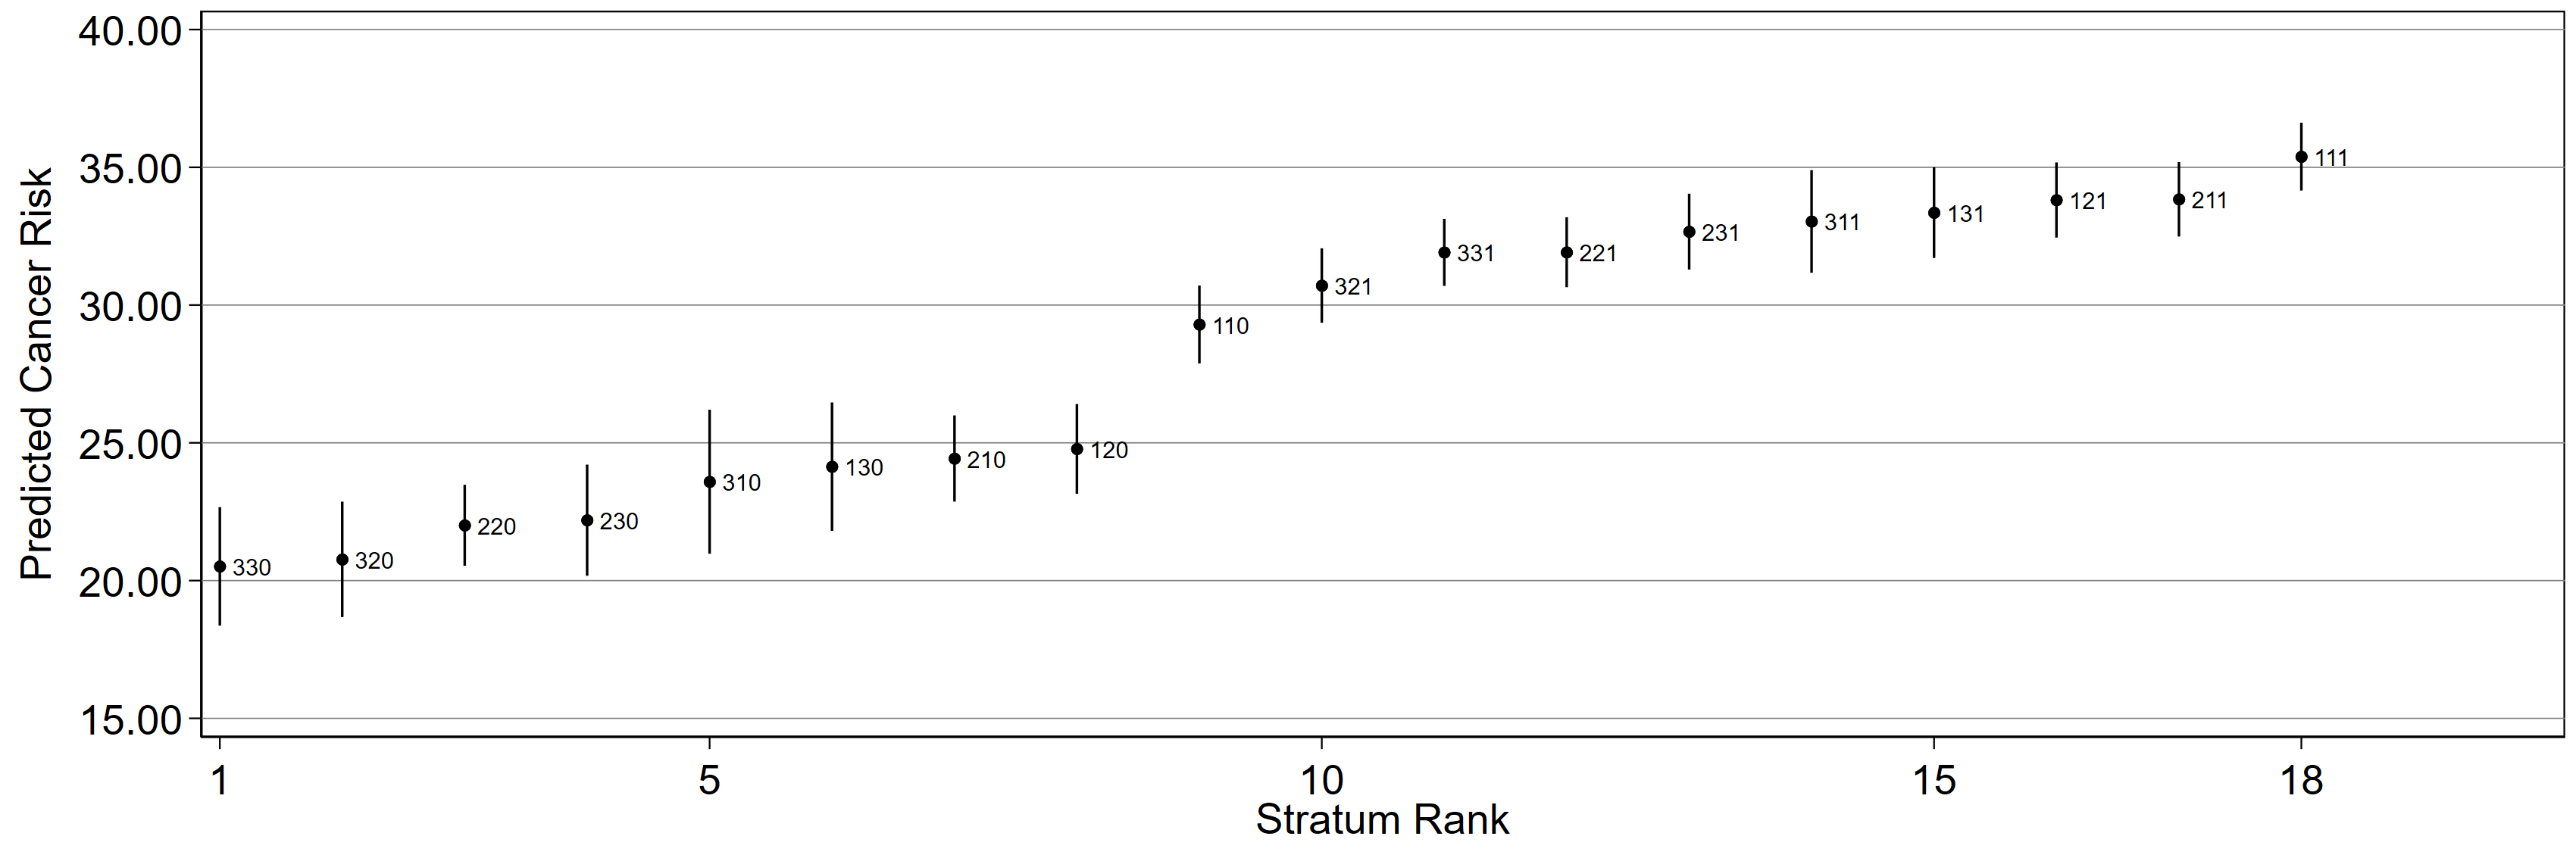